### EDA data viz
Output EDA graphs for presentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import pickle

%matplotlib inline
plt.style.use('seaborn-pastel')

import seaborn as sns
sns.set(style="whitegrid")

%run EDA_functions.py

In [2]:
with open('pickles/appt_v2_all0.pickle','rb') as read_file:
    appt_v4 = pickle.load(read_file)

In [3]:
appt_v4.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show',
       'No_show_num', 'SchedDay', 'SchedTime', 'SchedDayofWeek', 'ApptDay',
       'ApptDayofWeek', 'DayDiff', 'Handcap_bin', 'DayDiff2', 'Age2',
       'Neighbourhood2', 'ApptDayDiff', 'PrevApptDay', 'PrevAppt_No_show',
       'PrevAppt_Sched_diff', 'appt_count', 'total_appt_count',
       'total_no_show_count', 'no_show_rate', 'no_show_rate2',
       'prior_appt_count', 'prior_no_show_count', 'Reschedule', 'Follow_up'],
      dtype='object')

In [7]:
def bargraph(df,figx,figy,label,xtype='i',xlabel=''):
    #get labels with N counts
    x_labels=[]
    for row in df.iterrows():
        if xtype=='s':
            x_labels.append(f"{row[0]}\nN={int(row[1][2])}")
        else:
            x_labels.append(f"{int(row[0])}\nN={int(row[1][2])}")
    plt.figure(figsize=(figx,figy))
    plt.bar(df.index.values.astype(str),df['no_p']+df['yes_p'],color='#df8b60',label='Attended')
    plt.bar(df.index.values.astype(str),df['yes_p'],color='#6aadaa',label='Missed')
    plt.xticks(ticks=range(len(df)),labels=x_labels)
    plt.ylabel('(%)',rotation=0)
    plt.xlabel(xlabel)
#     plt.legend(loc='best')
    plt.savefig(f"figures/EDA_{label}.png", bbox_inches = 'tight')
    return plt.show();

#### Prior Appt Count

In [169]:
a = prior_appt_count_tab = crosstab('prior_appt_count',appt_v4)
a

No_show,No,Yes,All,no_p,yes_p
prior_appt_count,,,,,
0.0,32715,12995,45710,71.570772,28.429228
1.0,10409,4122,14531,71.633060,28.366940
2.0,3789,1580,5369,70.571801,29.428199
3.0,1665,679,2344,71.032423,28.967577
4.0,870,319,1189,73.170732,26.829268
5.0,508,159,667,76.161919,23.838081
6.0,321,98,419,76.610979,23.389021
7.0,231,56,287,80.487805,19.512195
8.0,156,41,197,79.187817,20.812183


In [215]:
a1 = a[:-1].copy()
a1['newrank'] = [15 if x >= 15 else x for x in a1.index]
a1
a2 = a1.groupby(a1['newrank'])['No','Yes'].sum()
a2['All'] = a2['No']+a2['Yes']
a2['no_p'] = a2['No']/a2['All']*100
a2['yes_p'] = a2['Yes']/a2['All']*100

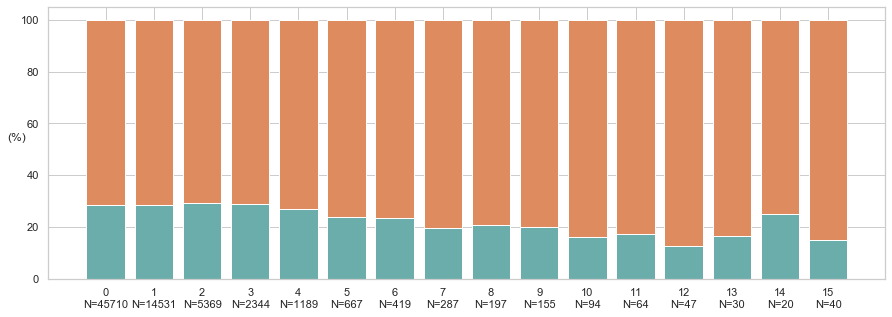

In [217]:
bargraph(a2,15,5,'prior_appt_count')

#### Prior no-show count

In [5]:
b = crosstab('prior_no_show_count',appt_v4)
b

No_show,No,Yes,All,no_p,yes_p
prior_no_show_count,,,,,
0.0,45278,16387,61665,73.425768,26.574232
1.0,4567,2776,7343,62.195288,37.804712
2.0,870,627,1497,58.116232,41.883768
3.0,211,200,411,51.338200,48.661800
4.0,75,73,148,50.675676,49.324324
5.0,24,32,56,42.857143,57.142857
6.0,8,14,22,36.363636,63.636364
7.0,0,9,9,0.000000,100.000000
8.0,2,4,6,33.333333,66.666667


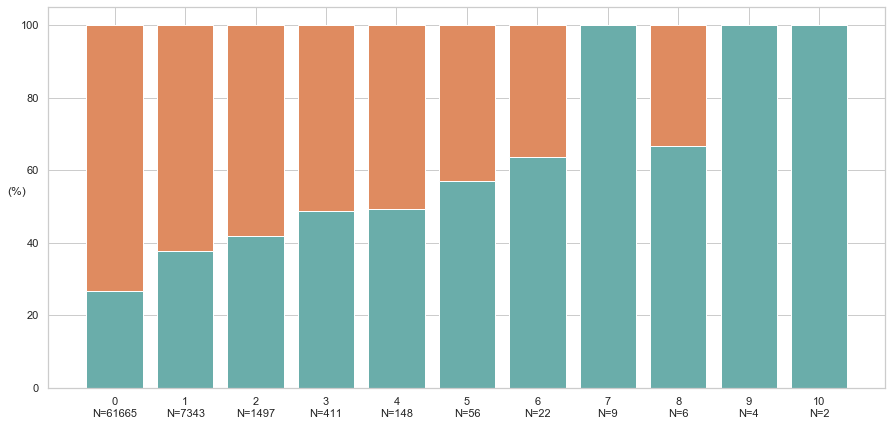

In [8]:
bargraph(b[:-1],15,7,'prior_no_show_count','Number of Prior Missed Appointments')

#### Age

In [190]:
c = crosstab('Age2',appt_v4)
c

No_show,No,Yes,All,no_p,yes_p
Age2,,,,,
0,1535,580,2115,72.576832,27.423168
1,688,387,1075,64.000000,36.000000
2,491,220,711,69.057665,30.942335
3,546,255,801,68.164794,31.835206
4,482,256,738,65.311653,34.688347
...,...,...,...,...,...
82,190,64,254,74.803150,25.196850
83,151,57,208,72.596154,27.403846
84,168,33,201,83.582090,16.417910


In [ ]:
df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])


In [201]:
c1 = c[:-1].copy()
c1['agegroup'] = pd.cut(x=c1.index,bins=[-1,9,19,29,39,49,59,69,79,120],labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','85+'])
c2 = c1.groupby(c1['agegroup'])['No','Yes'].sum()
c2['All'] = c2['No']+c2['Yes']
c2['no_p'] = c2['No']/c2['All']*100
c2['yes_p'] = c2['Yes']/c2['All']*100

In [205]:
x_labels=[]
for row in c2.iterrows():
    x_labels.append(f"{row[0]}\nN={int(row[1][2])}")
x_labels

['0-9\nN=7849',
 '10-19\nN=7870',
 '20-29\nN=8843',
 '30-39\nN=9727',
 '40-49\nN=9234',
 '50-59\nN=10833',
 '60-69\nN=8282',
 '70-79\nN=4148',
 '85+\nN=2262']

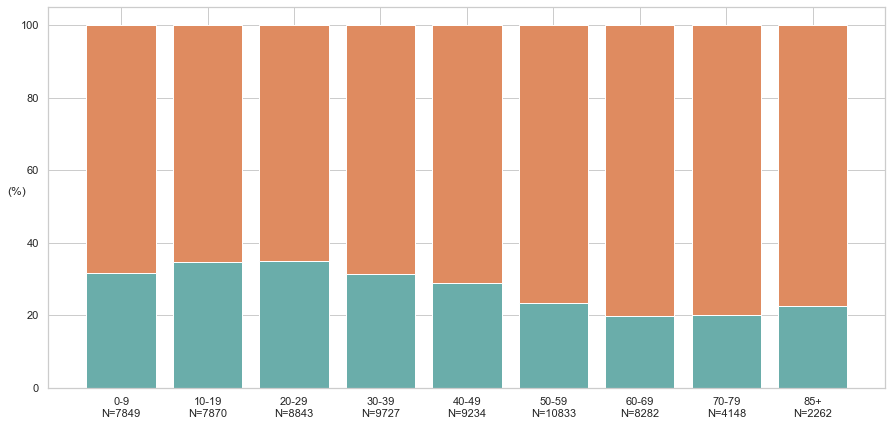

In [218]:
bargraph(c2,15,7,'age','s')

#### Conditions

In [ ]:
def bargraph2(df,figx,figy):
    #get labels with N counts
    x_labels=[]
    for row in df.iterrows():
        if row[0]==0:
            row[0]=='No'
            row[1]=='Yes'
        x_labels.append(f"{int(row[0])}\nN={int(row[1][2])}")
    plt.figure(figsize=(figx,figy))
    plt.bar(df.index.values.astype(str),df['no_p']+df['yes_p'],color='#df8b60',label='Attended')
    plt.bar(df.index.values.astype(str),df['yes_p'],color='#6aadaa',label='Missed')
    plt.xticks(ticks=range(len(df)),labels=x_labels)
#     plt.legend(loc='best')
    return plt.show();

In [219]:
d1 = crosstab('Hipertension',appt_v4)
d2 = crosstab('Diabetes',appt_v4)
d3 = crosstab('Alcoholism',appt_v4)
d4 = crosstab('Handcap_bin',appt_v4)
d5 = crosstab('Scholarship',appt_v4)

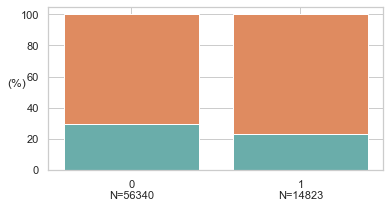

In [222]:
bargraph(d1[:-1],6,3,'hipertension')

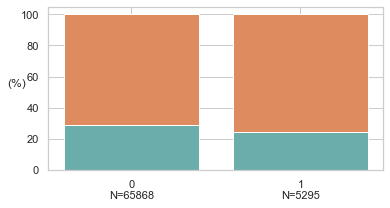

In [223]:
bargraph(d2[:-1],6,3,'diabetes')

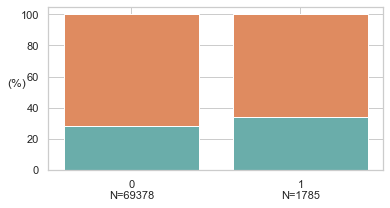

In [224]:
bargraph(d3[:-1],6,3,'alcoholism')

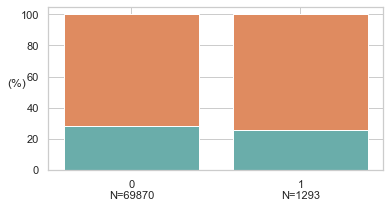

In [225]:
bargraph(d4[:-1],6,3,'handcap_bin')

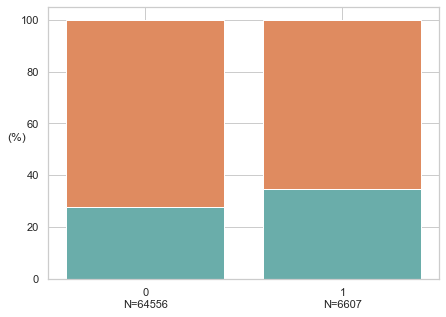

In [226]:
bargraph(d5[:-1],7,5,'scholarship')